## Simulaciones de Distribuciones Multivariantes

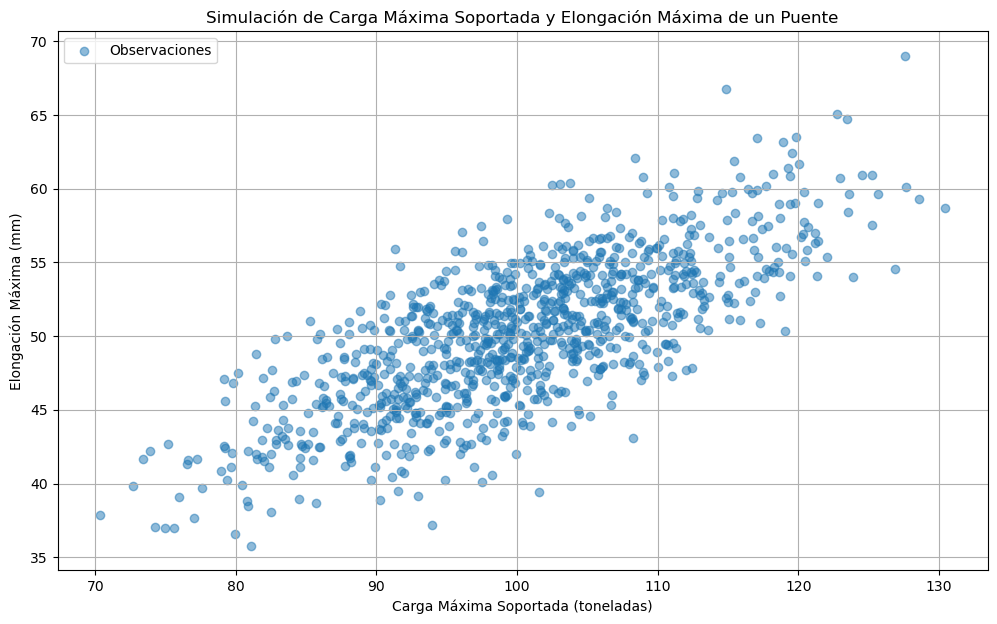

Media de Carga Máxima Soportada: 100.29535052696983 toneladas
Desviación Estándar de Carga Máxima Soportada: 10.103744136133733 toneladas
Media de Elongación Máxima: 50.17944393527142 mm
Desviación Estándar de Elongación Máxima: 5.0217645426336155 mm


In [2]:
# Paso 1: Definición de Parámetros
n_samples = 1000
means = [100, 50]  # Media de carga máxima y elongación máxima
covariances = [[100, 35], [35, 25]]  # Matriz de covarianza, reflejando una correlación positiva

# Paso 2: Generación de Distribuciones Multivariantes
samples = np.random.multivariate_normal(means, covariances, n_samples)

# Paso 3: Aplicación y Visualización
plt.figure(figsize=(12, 7))

# Gráfico de dispersión de las muestras
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5, label='Observaciones')
plt.title("Simulación de Carga Máxima Soportada y Elongación Máxima de un Puente")
plt.xlabel("Carga Máxima Soportada (toneladas)")
plt.ylabel("Elongación Máxima (mm)")
plt.legend()
plt.grid(True)
plt.show()

# Resumen estadístico
carga_maxima = samples[:, 0]
elongacion_maxima = samples[:, 1]
print(f"Media de Carga Máxima Soportada: {carga_maxima.mean()} toneladas")
print(f"Desviación Estándar de Carga Máxima Soportada: {carga_maxima.std()} toneladas")
print(f"Media de Elongación Máxima: {elongacion_maxima.mean()} mm")
print(f"Desviación Estándar de Elongación Máxima: {elongacion_maxima.std()} mm")


## Simulaciones de Distribuciones Multivariantes con MonteCarlo

In [3]:
# Fase 2: Simulación de Monte Carlo para Análisis de Fiabilidad
# Definir los límites máximos aceptables para carga y elongación (por simplicidad)
limite_carga_maxima = 120  # toneladas
limite_elongacion_maxima = 60  # mm

# Realizar simulaciones de Monte Carlo
n_simulaciones = 10000
fallos = 0

for _ in range(n_simulaciones):
    # Generar una observación aleatoria de carga y elongación
    observacion = np.random.multivariate_normal(means, covariances, 1)
    carga, elongacion = observacion[0]
    
    # Evaluar si la observación resulta en un fallo
    if carga > limite_carga_maxima or elongacion > limite_elongacion_maxima:
        fallos += 1

# Calcular la probabilidad de fallo
probabilidad_fallo = fallos / n_simulaciones

print(f"Probabilidad de fallo del puente: {probabilidad_fallo*100:.2f}%")

# Fase 3: Evaluación de Resultados y Análisis de Fiabilidad
# Este valor nos proporciona una medida de la fiabilidad del puente bajo las condiciones simuladas.


Probabilidad de fallo del puente: 4.29%


Carga promedio en fallos: 119.12 toneladas
Elongación promedio en fallos: 59.33 mm


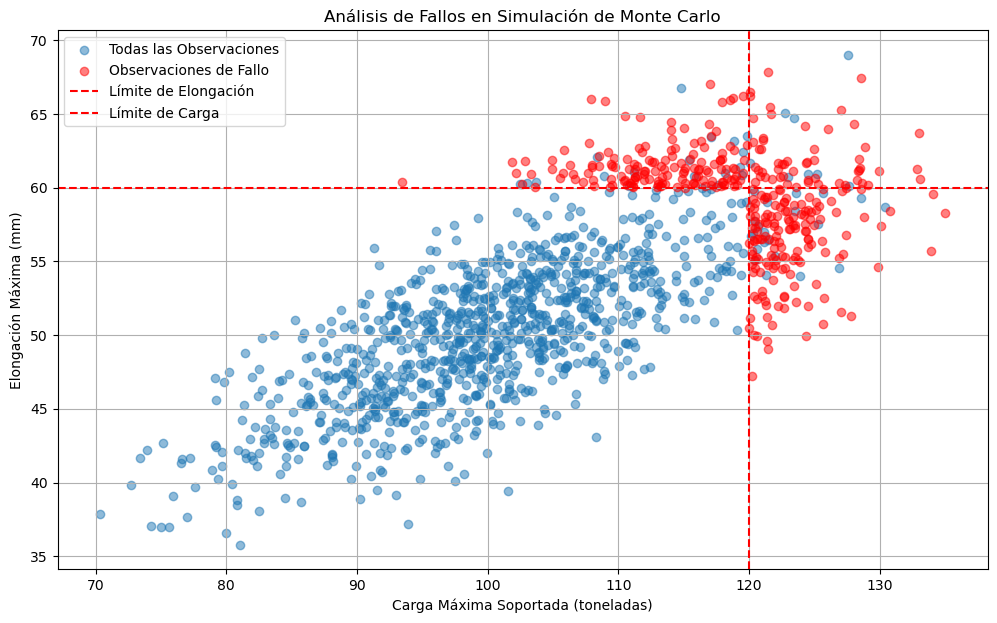

In [4]:
# Identificar y analizar las observaciones que resultan en fallo

# Almacenar observaciones que resultan en fallo para análisis posterior
fallos_observaciones = []

for _ in range(n_simulaciones):
    observacion = np.random.multivariate_normal(means, covariances, 1)
    carga, elongacion = observacion[0]
    
    # Evaluar si la observación resulta en un fallo
    if carga > limite_carga_maxima or elongacion > limite_elongacion_maxima:
        fallos += 1
        fallos_observaciones.append(observacion)

# Convertir la lista de fallos en un arreglo de NumPy para análisis
fallos_observaciones = np.array(fallos_observaciones).reshape(-1, 2)

# Análisis de tendencias y condiciones críticas en los fallos
if len(fallos_observaciones) > 0:
    cargas_fallo = fallos_observaciones[:, 0]
    elongaciones_fallo = fallos_observaciones[:, 1]

    # Identificar la carga y elongación promedio en fallos
    carga_promedio_fallo = np.mean(cargas_fallo)
    elongacion_promedio_fallo = np.mean(elongaciones_fallo)

    print(f"Carga promedio en fallos: {carga_promedio_fallo:.2f} toneladas")
    print(f"Elongación promedio en fallos: {elongacion_promedio_fallo:.2f} mm")

    # Visualización de fallos
    plt.figure(figsize=(12, 7))
    plt.scatter(samples[:, 0], samples[:, 1], alpha=0.5, label='Todas las Observaciones')
    plt.scatter(fallos_observaciones[:, 0], fallos_observaciones[:, 1], color='red', alpha=0.5, label='Observaciones de Fallo')
    plt.axhline(y=limite_elongacion_maxima, color='r', linestyle='--', label='Límite de Elongación')
    plt.axvline(x=limite_carga_maxima, color='r', linestyle='--', label='Límite de Carga')
    plt.title("Análisis de Fallos en Simulación de Monte Carlo")
    plt.xlabel("Carga Máxima Soportada (toneladas)")
    plt.ylabel("Elongación Máxima (mm)")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No hubo fallos en las simulaciones.")


## Modelos de Inventario Determinístico

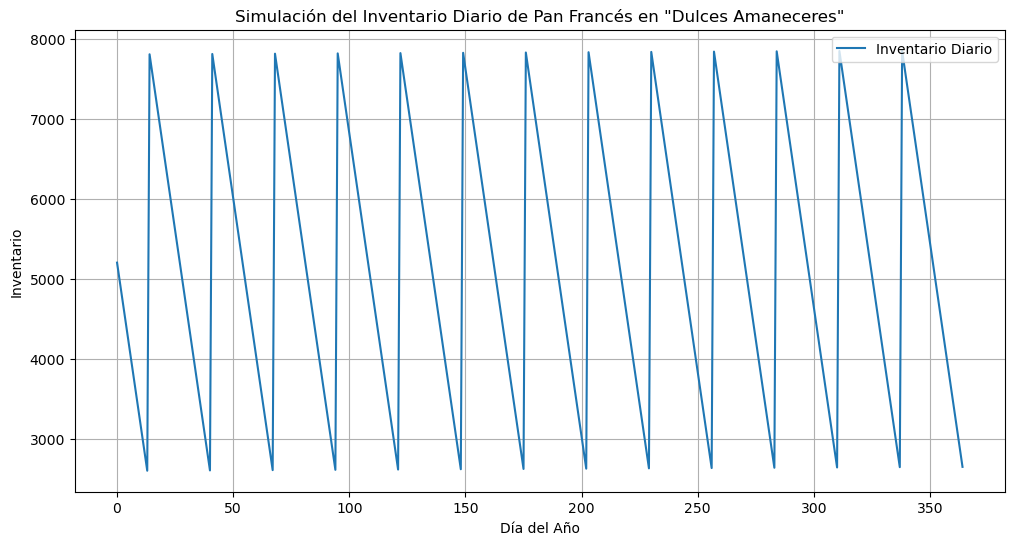

Cantidad Óptima de Pedido (EOQ): 5403.70 unidades
Número de Pedidos al Año: 13.51
Tiempo Entre Pedidos: 27.02 días
Costo Total Anual: $189024.83


In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del modelo para "Dulces Amaneceres"
demanda_diaria = 200  # Estimación de la demanda diaria de pan francés
dias_operativos_anuales = 365  # Días de operación al año
costo_produccion_pedido = 20  # Costo fijo por realizar un pedido de producción
costo_mantenimiento = 0.10  # Costo de mantener un pan en inventario por día
costo_escasez = 0.50  # Costo por cada pan faltante en caso de escasez

# Convertir demanda diaria a demanda anual
demanda_anual = demanda_diaria * dias_operativos_anuales

# Cálculo de la Cantidad Óptima de Pedido (EOQ)
EOQ = np.sqrt((2 * demanda_anual * costo_produccion_pedido) / costo_mantenimiento)

# Cálculo del número de pedidos necesarios por año y el tiempo entre pedidos
num_pedidos = demanda_anual / EOQ
tiempo_entre_pedidos = dias_operativos_anuales / num_pedidos

# Simulación de inventario a lo largo de un año
inventario_inicial = EOQ  # Comenzamos con un inventario igual al EOQ
inventario = inventario_inicial
costo_total = 0

# Registro de inventario diario para visualización
inventario_diario = []

for dia in range(dias_operativos_anuales):
    # Supongamos que la demanda es constante
    demanda = demanda_diaria
    
    # Reordenar si el inventario es igual al punto de reorden
    if inventario <= EOQ / 2:
        inventario += EOQ
    
    # Satisfacer la demanda diaria
    inventario -= demanda
    inventario_diario.append(inventario)
    
    # Calcular costos
    if inventario >= 0:
        costo_total += inventario * costo_mantenimiento
    else:
        # Costo de escasez más restablecer inventario a 0
        costo_total += abs(inventario) * costo_escasez
        inventario = 0

# Visualización del nivel de inventario a lo largo del año
plt.figure(figsize=(12, 6))
plt.plot(inventario_diario, label='Inventario Diario')
plt.title('Simulación del Inventario Diario de Pan Francés en "Dulces Amaneceres"')
plt.xlabel('Día del Año')
plt.ylabel('Inventario')
plt.legend()
plt.grid(True)
plt.show()


# Mostrar resultados del modelo
print(f"Cantidad Óptima de Pedido (EOQ): {EOQ:.2f} unidades")
print(f"Número de Pedidos al Año: {num_pedidos:.2f}")
print(f"Tiempo Entre Pedidos: {tiempo_entre_pedidos:.2f} días")
print(f"Costo Total Anual: ${costo_total:.2f}")



In [51]:
import pandas as pd

# Definimos una función para simular el inventario durante un año
def simular_inventario_panaderia(demanda_diaria, EOQ, costo_produccion_pedido, costo_mantenimiento, costo_escasez, dias_operativos_anuales):
    inventario = EOQ  # Comenzamos con un inventario igual al EOQ
    pedidos = []
    costos = []
    demanda_total = 0
    pedido_pendiente = False
    tiempo_para_llegada_pedido = 0

    for dia in range(dias_operativos_anuales):
        if pedido_pendiente and tiempo_para_llegada_pedido == 0:
            inventario += EOQ
            pedido_pendiente = False
        
        # Simulamos la demanda diaria y actualizamos el inventario
        demanda = np.random.poisson(demanda_diaria)  # Supongamos que la demanda sigue una distribución de Poisson
        demanda_total += demanda
        inventario -= demanda

        # Decidimos si hacer un pedido
        if inventario < EOQ / 2 and not pedido_pendiente:
            pedidos.append(1)
            costos.append(costo_produccion_pedido)
            pedido_pendiente = True
            tiempo_para_llegada_pedido = np.random.randint(1, 3)  # Suponemos que el pedido puede llegar en 1 o 2 días
        else:
            pedidos.append(0)
            costos.append(0)

        # Calculamos los costos de mantenimiento y escasez
        if inventario > 0:
            costo_mant = inventario * costo_mantenimiento
            costo_esc = 0
        else:
            costo_mant = 0
            costo_esc = abs(inventario) * costo_escasez
        
        costos[-1] += costo_mant + costo_esc  # Agregamos los costos de mantenimiento y escasez al costo del día

        if pedido_pendiente:
            tiempo_para_llegada_pedido -= 1

    # Creamos un DataFrame para almacenar los resultados
    resultados = pd.DataFrame({
        'Día': range(dias_operativos_anuales),
        'Demanda': [np.random.poisson(demanda_diaria) for _ in range(dias_operativos_anuales)],
        'Pedido Realizado': pedidos,
        'Costo Diario': costos
    })
    return resultados

# Parámetros del modelo
demanda_diaria = 200
EOQ = 5403.70  # Ejemplo de EOQ calculado previamente
costo_produccion_pedido = 20
costo_mantenimiento = 0.10
costo_escasez = 0.50
dias_operativos_anuales = 365

# Simulamos el inventario para la panadería "Dulces Amaneceres"
resultados_simulacion = simular_inventario_panaderia(
    demanda_diaria, EOQ, costo_produccion_pedido, costo_mantenimiento, costo_escasez, dias_operativos_anuales
)

# Resumen estadístico
estadisticas_descriptivas = resultados_simulacion.describe()

# Mostrar los primeros resultados de la simulación y las estadísticas descriptivas
resultados_simulacion.head(), estadisticas_descriptivas



(   Día  Demanda  Pedido Realizado  Costo Diario
 0    0      189                 0        518.47
 1    1      211                 0        498.37
 2    2      211                 0        476.87
 3    3      218                 0        454.27
 4    4      172                 0        436.57,
               Día     Demanda  Pedido Realizado  Costo Diario
 count  365.000000  365.000000        365.000000    365.000000
 mean   182.000000  200.320548          0.038356    503.357151
 std    105.510663   13.644575          0.192318    156.056333
 min      0.000000  163.000000          0.000000    231.970000
 25%     91.000000  191.000000          0.000000    369.840000
 50%    182.000000  200.000000          0.000000    498.370000
 75%    273.000000  209.000000          0.000000    640.900000
 max    364.000000  243.000000          1.000000    788.410000)

### Modelos de Inventario Determinístico CON MONTE CARLO

In [67]:
import numpy as np
import pandas as pd

# Parámetros de la simulación
demanda_diaria = 200
dias_operativos_anuales = 365
costo_produccion_pedido = 20
costo_mantenimiento = 0.10
costo_escasez = 0.50
iteraciones = 1000  # Número de iteraciones Monte Carlo

# Función para simular un año de operación
def simular_año(demanda_diaria, EOQ, costo_produccion_pedido, costo_mantenimiento, costo_escasez, dias_operativos_anuales):
    inventario = EOQ
    costo_total = 0
    pedidos_realizados = 0
    for dia in range(dias_operativos_anuales):
        demanda = np.random.poisson(demanda_diaria)
        if inventario < EOQ / 2:
            inventario += EOQ
            costo_total += costo_produccion_pedido
            pedidos_realizados += 1
        inventario -= demanda
        if inventario >= 0:
            costo_total += inventario * costo_mantenimiento
        else:
            costo_total += abs(inventario) * costo_escasez
            inventario = 0
    return costo_total, pedidos_realizados

# Ejecución de la simulación Monte Carlo
costos_totales = []
pedidos_anuales = []

EOQ = np.sqrt((2 * demanda_diaria * dias_operativos_anuales * costo_produccion_pedido) / costo_mantenimiento)

for _ in range(iteraciones):
    costo_total, pedidos_realizados = simular_año(demanda_diaria, EOQ, costo_produccion_pedido, costo_mantenimiento, costo_escasez, dias_operativos_anuales)
    costos_totales.append(costo_total)
    pedidos_anuales.append(pedidos_realizados)

# Análisis de resultados
costos_totales = np.array(costos_totales)
pedidos_anuales = np.array(pedidos_anuales)
costo_promedio = np.mean(costos_totales)
costo_std = np.std(costos_totales)
pedidos_promedio = np.mean(pedidos_anuales)
pedidos_std = np.std(pedidos_anuales)


resultados_formato = {
    "Costo Total Anual Promedio": f"${costo_promedio:,.2f}",
    "Desviación Estándar del Costo Total Anual": f"${costo_std:.2f}",
    "Número Promedio de Pedidos al Año": f"{pedidos_promedio:.2f}",
    "Desviación Estándar del Número de Pedidos al Año": f"{pedidos_std:.2f}"
}

resultados_formato



{'Costo Total Anual Promedio': '$188,689.85',
 'Desviación Estándar del Costo Total Anual': '$675.04',
 'Número Promedio de Pedidos al Año': '13.30',
 'Desviación Estándar del Número de Pedidos al Año': '0.46'}

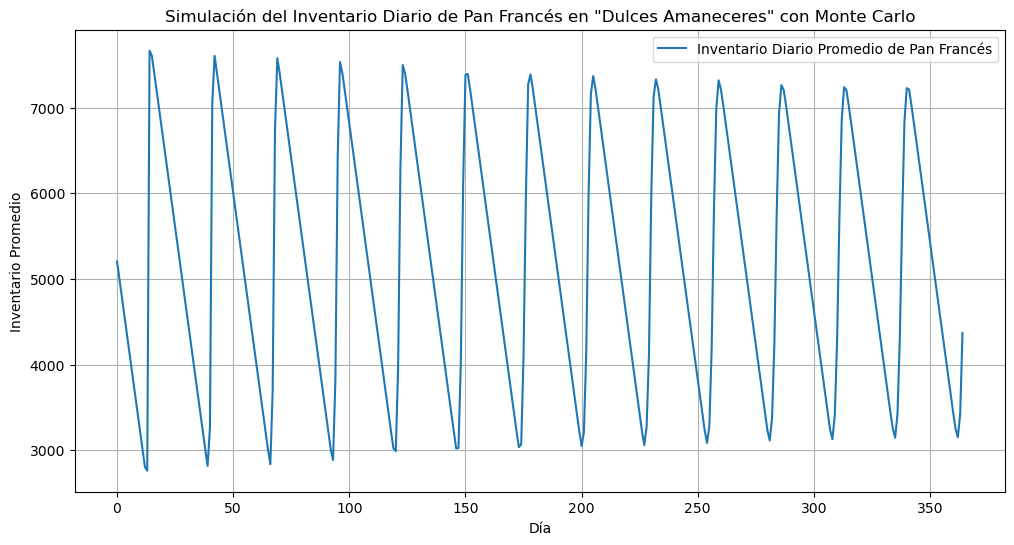

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la simulación
demanda_diaria_pan_frances = 200  # Demanda diaria de Pan Francés
dias_operativos_anuales = 365  # Días operativos al año
costo_produccion_pedido = 20  # Costo de producción por pedido
costo_mantenimiento = 0.10  # Costo de mantenimiento por unidad
EOQ_pan_frances = np.sqrt((2 * demanda_diaria_pan_frances * dias_operativos_anuales * costo_produccion_pedido) / costo_mantenimiento)  # Cálculo de EOQ para Pan Francés
iteraciones = 1000  # Número de iteraciones para la simulación de Monte Carlo

# Función para simular el inventario diario a lo largo de un año
def simular_inventario_diario(demanda_diaria, EOQ, dias_operativos_anuales):
    inventario_diario = []
    inventario = EOQ
    for dia in range(dias_operativos_anuales):
        demanda = np.random.poisson(demanda_diaria)
        if inventario < EOQ / 2:
            inventario += EOQ
        inventario -= demanda
        inventario = max(inventario, 0)  # Evitar inventario negativo
        inventario_diario.append(inventario)
    return inventario_diario

# Ejecución de la simulación de Monte Carlo para el inventario diario
inventario_diario_monte_carlo = np.zeros((iteraciones, dias_operativos_anuales))

for i in range(iteraciones):
    inventario_diario_monte_carlo[i, :] = simular_inventario_diario(demanda_diaria_pan_frances, EOQ_pan_frances, dias_operativos_anuales)

# Cálculo del inventario diario promedio a lo largo de las iteraciones de Monte Carlo
inventario_diario_promedio = np.mean(inventario_diario_monte_carlo, axis=0)

# Generación de la gráfica
plt.figure(figsize=(12, 6))
plt.plot(inventario_diario_promedio, label='Inventario Diario Promedio de Pan Francés')
plt.title('Simulación del Inventario Diario de Pan Francés en "Dulces Amaneceres" con Monte Carlo')
plt.xlabel('Día')
plt.ylabel('Inventario Promedio')
plt.legend()
plt.grid(True)
plt.show()


In [69]:
import numpy as np
import pandas as pd

# Parámetros de la simulación
demanda_diaria = 200
dias_operativos_anuales = 365
costo_produccion_pedido = 20
costo_mantenimiento = 0.10
costo_escasez = 0.50
EOQ = np.sqrt((2 * demanda_diaria * dias_operativos_anuales * costo_produccion_pedido) / costo_mantenimiento)

# Función para simular un día con costo incluido
def simular_dia_con_costo(demanda_diaria, EOQ, costo_produccion_pedido, costo_mantenimiento, costo_escasez):
    demanda = np.random.poisson(demanda_diaria)
    pedido_realizado = 0
    inventario = EOQ
    costo_diario = costo_produccion_pedido if inventario < EOQ / 2 else 0
    inventario = EOQ if inventario < EOQ / 2 else inventario
    inventario -= demanda
    costo_mantenimiento_diario = inventario * costo_mantenimiento if inventario >= 0 else 0
    costo_escasez_diario = abs(inventario) * costo_escasez if inventario < 0 else 0
    inventario = max(inventario, 0)
    costo_diario += costo_mantenimiento_diario + costo_escasez_diario
    return demanda, 1 if inventario < EOQ / 2 else 0, costo_diario

# Lista para almacenar los resultados
resultados_lista = []

# Simulación para un año
for dia in range(dias_operativos_anuales):
    demanda, pedido_realizado, costo_diario = simular_dia_con_costo(demanda_diaria, EOQ, costo_produccion_pedido, costo_mantenimiento, costo_escasez)
    resultados_lista.append([dia, demanda, pedido_realizado, costo_diario])

# Convertir la lista a DataFrame
resultados = pd.DataFrame(resultados_lista, columns=['Día', 'Demanda', 'Pedido Realizado', 'Costo Diario'])

# Mostrar las primeras 5 filas y estadísticas descriptivas
print("Primeras 5 filas:\n", resultados.head())
print("\nEstadísticas descriptivas:\n", resultados.describe())


Primeras 5 filas:
    Día  Demanda  Pedido Realizado  Costo Diario
0    0      209                 0    519.470243
1    1      200                 0    520.370243
2    2      198                 0    520.570243
3    3      204                 0    519.970243
4    4      200                 0    520.370243

Estadísticas descriptivas:
               Día     Demanda  Pedido Realizado  Costo Diario
count  365.000000  365.000000             365.0    365.000000
mean   182.000000  198.493151               0.0    520.520928
std    105.510663   14.232299               0.0      1.423230
min      0.000000  158.000000               0.0    516.470243
25%     91.000000  190.000000               0.0    519.670243
50%    182.000000  198.000000               0.0    520.570243
75%    273.000000  207.000000               0.0    521.370243
max    364.000000  239.000000               0.0    524.570243


## SIMULACION DE MONTE CARLO

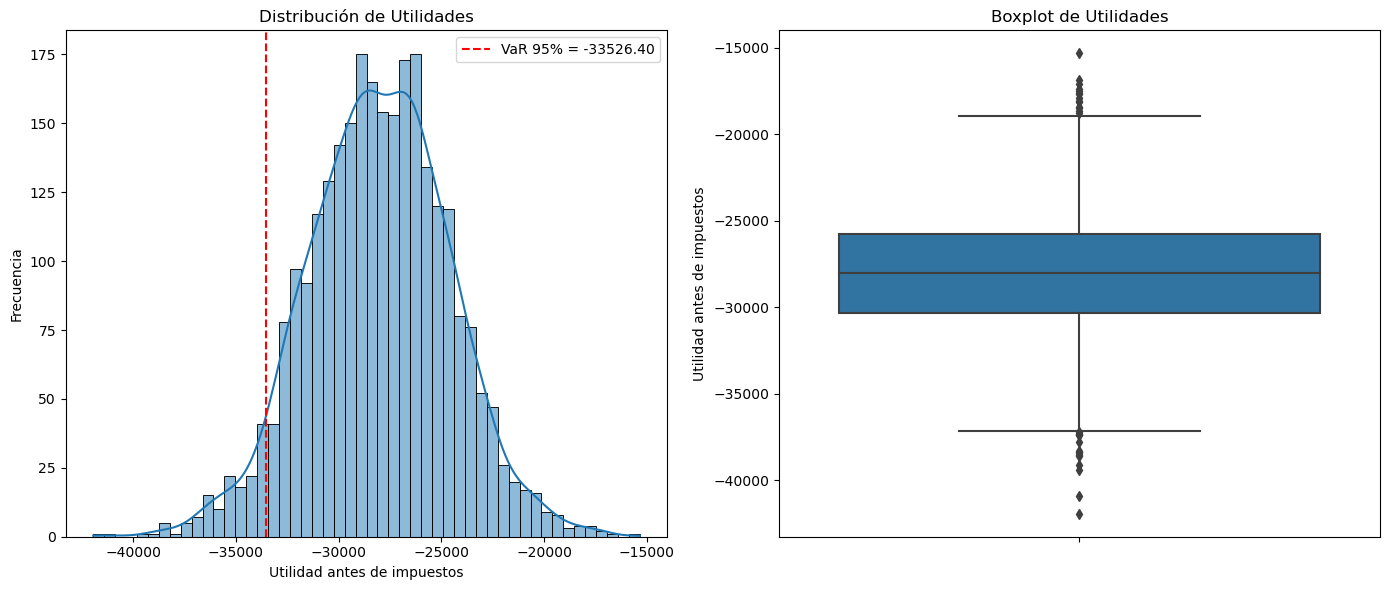

{'Utilidad Media': -28032.763313659834,
 'Utilidad Mediana': -28002.04647367191,
 'Valor en Riesgo (VaR) 95%': -33526.398970171016,
 'Porcentaje de Utilidades Positivas': 0.0}

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Parámetros de la simulación
n_simulaciones = 2730
costos_fijos = 50000

# Precios de venta por hora
precio_venta = {
    'automatizacion': 150,
    'funcional': 120,
    'performance': 180
}

# Costos variables por hora
costo_variable = {
    'automatizacion': 100,
    'funcional': 80,
    'performance': 120
}

# Demandas estimadas (horas vendidas por mes)
demanda_media = {
    'automatizacion': 200,
    'funcional': 150,
    'performance': 100
}

demanda_desviacion = {
    'automatizacion': 50,
    'funcional': 40,
    'performance': 30
}

# Arrays para almacenar los resultados de cada simulación
utilidades = []

for _ in range(n_simulaciones):
    ingresos_total = 0
    costos_variables_total = 0
    
    for servicio, precio in precio_venta.items():
        horas_vendidas = np.random.normal(demanda_media[servicio], demanda_desviacion[servicio])
        ingresos = horas_vendidas * precio
        costos = horas_vendidas * costo_variable[servicio]
        
        ingresos_total += ingresos
        costos_variables_total += costos
        
    utilidad = ingresos_total - costos_variables_total - costos_fijos
    utilidades.append(utilidad)

# Análisis de resultados
utilidades = np.array(utilidades)
utilidades_positivas = utilidades[utilidades > 0]

# Valor en Riesgo (VaR) al 95%
VaR_95 = np.percentile(utilidades, 5)

# Gráficas
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(utilidades, bins=50, kde=True)
plt.axvline(VaR_95, color='r', linestyle='--', label=f'VaR 95% = {VaR_95:.2f}')
plt.title('Distribución de Utilidades')
plt.xlabel('Utilidad antes de impuestos')
plt.ylabel('Frecuencia')
plt.legend()

plt.subplot(1, 2, 2)
sns.boxplot(y=utilidades)
plt.title('Boxplot de Utilidades')
plt.ylabel('Utilidad antes de impuestos')

plt.tight_layout()
plt.show()

# Resultados numéricos
porcentaje_utilidades_positivas = (len(utilidades_positivas) / n_simulaciones) * 100
utilidad_media = np.mean(utilidades)
utilidad_mediana = np.median(utilidades)

# Organizamos los resultados numéricos con nombres para cada uno
resultados_numericos = {
    'Utilidad Media': utilidad_media,
    'Utilidad Mediana': utilidad_mediana,
    'Valor en Riesgo (VaR) 95%': VaR_95,
    'Porcentaje de Utilidades Positivas': porcentaje_utilidades_positivas
}

resultados_numericos


## Análisis de escenarios

In [71]:
# Calculamos las horas vendidas bajo los diferentes escenarios
def calcular_horas_vendidas(demanda_media, demanda_desviacion, escenario):
    horas_vendidas_escenario = {}
    for servicio in demanda_media.keys():
        if escenario == 'pesimista':
            # Para el escenario pesimista tomaremos un valor en el percentil 5 de la distribución normal
            horas_vendidas_escenario[servicio] = np.random.normal(demanda_media[servicio], demanda_desviacion[servicio], n_simulaciones)[int(0.05 * n_simulaciones)]
        elif escenario == 'probable':
            # Para el escenario probable tomaremos la mediana de la distribución normal
            horas_vendidas_escenario[servicio] = np.median(np.random.normal(demanda_media[servicio], demanda_desviacion[servicio], n_simulaciones))
        elif escenario == 'optimista':
            # Para el escenario optimista tomaremos un valor en el percentil 95 de la distribución normal
            horas_vendidas_escenario[servicio] = np.random.normal(demanda_media[servicio], demanda_desviacion[servicio], n_simulaciones)[int(0.95 * n_simulaciones)]
    return horas_vendidas_escenario

# Utilidad antes de impuestos para cada escenario
uai_pesimista = np.percentile(utilidades, 5)
uai_probable = np.percentile(utilidades, 50)
uai_optimista = np.percentile(utilidades, 95)

# Horas vendidas para cada escenario
horas_pesimista = calcular_horas_vendidas(demanda_media, demanda_desviacion, 'pesimista')
horas_probable = calcular_horas_vendidas(demanda_media, demanda_desviacion, 'probable')
horas_optimista = calcular_horas_vendidas(demanda_media, demanda_desviacion, 'optimista')

# Creamos la tabla
tabla_escenarios = {
    'Concepto': ['Criterio', 'UAI / PAI'] + list(precio_venta.keys()),
    'Pesimista': ['La máxima pérdida', uai_pesimista] + list(horas_pesimista.values()),
    'Probable': ['El resultado más recurrente', uai_probable] + list(horas_probable.values()),
    'Optimista': ['La máxima utilidad', uai_optimista] + list(horas_optimista.values())
}

# Convertimos la tabla a formato adecuado para visualización
import pandas as pd
df_tabla_escenarios = pd.DataFrame(tabla_escenarios)
df_tabla_escenarios.set_index('Concepto', inplace=True)

df_tabla_escenarios


,Pesimista,Probable,Optimista
Concepto,,,
Criterio,La máxima pérdida,El resultado más recurrente,La máxima utilidad
UAI / PAI,-33809.919505,-28033.225774,-22142.18251
automatizacion,193.539067,200.392409,121.897556
funcional,126.266072,150.83561,139.018517
performance,114.504144,99.876251,39.195639
